## Part 18
    -Pandas Continue

In [1]:
import pandas as pd 

salary_df=pd.read_csv('../datasets/salary_data.csv')
salary_df.head(15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [2]:
#Dataframe baata kunai particular column remove garnu paryo
salary_df_gender_removed=salary_df.drop(columns=['Gender'])
# salary_df.drop(columns=['Gender'],inplace=True)       Yo chaai puraanai dataframe ma change aauchha
salary_df_gender_removed.head(2)

,Age,Education Level,Job Title,Years of Experience,Salary
0,32.0,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Master's,Data Analyst,3.0,65000.0


In [3]:
#To get the null value in the given dataframe
salary_df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [4]:
# Null value hataaunu parnechha vane k garne ?
# salary_df.dropna(inplace=True)

In [5]:
# aba fari check garne kata gayo vanera 
salary_df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [6]:
salary_df.shape

(6704, 6)

In [7]:
# Null value laai required value le fill garne (Imputations)

# salary_df["Age"]=salary_df.fillna(salary_df["Age"].median())
# salary_df.isnull().sum()


In [8]:
# Median age chaai kati ho vanera check garnu paryo vane 
salary_df["Salary"].median()

np.float64(115000.0)

In [9]:
#Similary categorical data maa mode check garnu paryo vane 
salary_df["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [10]:
# Different gender kati kati wota chhan check garnu paryo vane 

salary_df["Gender"].value_counts()

Gender
Male      3674
Female    3014
Other       14
Name: count, dtype: int64

In [11]:
# Filter garera other gender vaako data matra hernu paryovane k garne 
# other_df=salary_df[salary_df["Gender"].values=="Other"]
# other_df.head(14)
salary_filtered=salary_df[salary_df["Salary"].values>=200000]
salary_filtered.head(7)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
4,52.0,Male,Master's,Director,20.0,200000.0
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
53,47.0,Male,Master's,VP of Finance,19.0,200000.0
83,52.0,Male,PhD,Chief Technology Officer,24.0,250000.0
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0
1211,61.0,Male,PhD,Software Engineer Manager,20.0,200000.0
1225,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0


In [12]:
# Get rows where "Gender " is missing 
gender_missing_rows=salary_df[salary_df["Gender"].isnull()]
gender_missing_rows

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Cleaning

In [13]:
 
# Jun jun data maa null value chha tyeslaai mean,median,mode le 
# replace garna sakinchha

#missing numerical values are replaced with median value


salary_df["Age"]=salary_df["Age"].fillna(salary_df["Age"].median())
salary_df["Salary"]=salary_df["Salary"].fillna(salary_df["Salary"].median())
salary_df["Years of Experience"]=salary_df["Years of Experience"].fillna(salary_df["Years of Experience"].median())

# missing categorical replaced with mode 
salary_df["Gender"]=salary_df["Gender"].fillna(salary_df["Gender"].mode()[0])
salary_df["Education Level"]=salary_df["Education Level"].fillna(salary_df["Education Level"].mode()[0])
salary_df["Job Title"]=salary_df["Job Title"].fillna(salary_df["Job Title"].mode()[0])





In [14]:
salary_df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

##### Part 19

In [15]:
# Check for duplicate data 
print(salary_df.duplicated().sum())
print(salary_df.shape)


# Real world ma yati dheraiduplicatedatako kaam chhaiana,,but aile laai chhordine

4912
(6704, 6)


There are too many duplicate rows in the table , so not removingthem for now

In [16]:
# # Print duplicate rows
# # salary_df[salary_df.duplicated()]                 #Yesle duplicate value matra dekhauxa
# salary_df[salary_df.duplicated(keep=False)]     # Yesle kun sanga duplicate chha ni dekhaauxa
salary_df[salary_df.duplicated()] [:5]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0


In [17]:
# Kunjob title ma kati jana chhan herna milxa
salary_df["Salary"].value_counts()
# salary_df["Salary"].value_counts()[:10]           # Top 10 value counts


Salary
140000.0    287
120000.0    282
160000.0    276
55000.0     251
170000.0    231
           ... 
178284.0      1
75969.0       1
143705.0      1
197354.0      1
100358.0      1
Name: count, Length: 444, dtype: int64

In [18]:
# Printing values for education level
salary_df["Education Level"].value_counts()

Education Level
Bachelor's Degree    2270
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [19]:
# Replacing one valuein the dataframe with other 
salary_df["Education Level"]=salary_df["Education Level"].replace({"PhD":"PHD"})

In [20]:
# Checking the values again 
salary_df["Education Level"].value_counts()


Education Level
Bachelor's Degree    2270
Master's Degree      1573
PHD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [21]:
# Checking the number of columns 
salary_df.columns 

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [22]:
# add a new column increased salary
salary_df["increased_salary"]=salary_df["Salary"]*1.05
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,increased_salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,94500.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,68250.0
2,45.0,Male,PHD,Senior Manager,15.0,150000.0,157500.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,63000.0
4,52.0,Male,Master's,Director,20.0,200000.0,210000.0


In [23]:
# Rename column "increased_salary" to "Salary Increased"
salary_df=salary_df.rename(columns={"increased_salary":"Salary Increased"})
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Salary Increased
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,94500.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,68250.0
2,45.0,Male,PHD,Senior Manager,15.0,150000.0,157500.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,63000.0
4,52.0,Male,Master's,Director,20.0,200000.0,210000.0


In [24]:
# drop column Salary Increased
salary_df=salary_df.drop("Salary Increased",axis=1)
salary_df.head() 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PHD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [25]:
# Print top 10 salary 

# salary_df.sort_values("Salary",ascending=False).head(10)
salary_df.nlargest(10,"Years of Experience")

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2421,60.0,Female,PHD,Software Engineer Manager,34.0,188651.0
2501,60.0,Female,PHD,Software Engineer Manager,34.0,188651.0
2396,60.0,Female,PHD,Software Engineer Manager,33.0,179180.0
2401,57.0,Female,PHD,Software Engineer Manager,33.0,191790.0
2435,57.0,Female,Master's Degree,Full Stack Engineer,33.0,188232.0
2476,60.0,Female,PHD,Software Engineer Manager,33.0,179180.0
2481,57.0,Female,PHD,Software Engineer Manager,33.0,191790.0
2515,57.0,Female,Master's Degree,Full Stack Engineer,33.0,188232.0
2820,54.0,Male,Master's Degree,Senior Software Engineer,32.0,195270.0
2846,54.0,Female,PHD,Software Engineer Manager,32.0,191510.0


In [26]:
df_no_duplicates=salary_df.drop_duplicates()
# print(df_no_duplicates.shape)
df_no_duplicates.nlargest(5,"Salary")

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
83,52.0,Male,PHD,Chief Technology Officer,24.0,250000.0
5001,45.0,Male,Bachelor's Degree,Financial Manager,21.0,250000.0
4276,51.0,Male,PHD,Data Scientist,24.0,240000.0
4397,49.0,Male,Master's Degree,Marketing Manager,23.0,228000.0


#### DATA VISUALISATION 

In [27]:
#pip install matplotlib
#pip install seaborn
#pip show seaborn
# pip show matplotlib

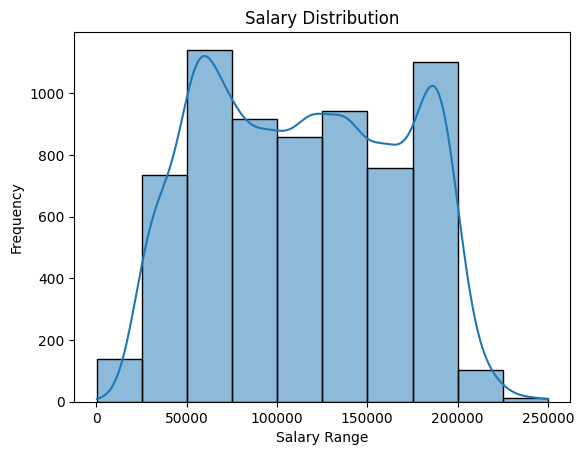

'  years of experience, Education level , sabai ko laagi herna sakinchha '

In [28]:
# Histogram on salary col
# Histogram is generally preferred for univariate data 

import seaborn as sns
import matplotlib.pyplot as plt 

sns.histplot(data=salary_df,x='Salary',kde=True,bins=10)

#Labels
plt.xlabel("Salary Range")
plt.ylabel("Frequency")
plt.title("Salary Distribution")
plt.show()

"""  years of experience, Education level , sabai ko laagi herna sakinchha """

C:\Users\Bina computer jnk\AppData\Local\Temp\ipykernel_11656\3053088479.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=salary_df, x="Education Level", y="Salary", ci=None)


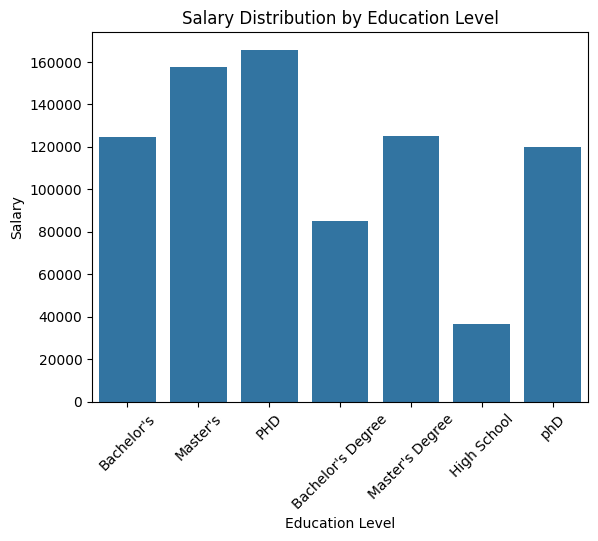

In [29]:
# Bar Chart  is used for multivariate data 
sns.barplot(data=salary_df, x="Education Level", y="Salary", ci=None)

# Formatting,labels
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Salary")
plt.title("Salary Distribution by Education Level")

plt.show()

In [30]:
# Grouping salary by gender 
grouped_salary=salary_df.groupby("Gender")["Salary"].sum()
grouped_salary

Gender
Female    325184553.0
Male      446203606.0
Other       1762178.0
Name: Salary, dtype: float64

In [31]:
print(grouped_salary.index)
print(grouped_salary.values)

Index(['Female', 'Male', 'Other'], dtype='object', name='Gender')
[3.25184553e+08 4.46203606e+08 1.76217800e+06]


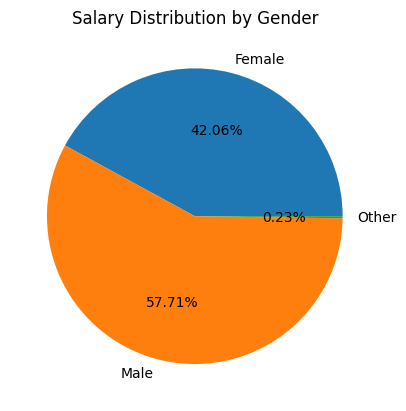

In [32]:
# Pie chart 
plt.pie(grouped_salary,labels=grouped_salary.index,autopct='%1.2f%%')

#Title
plt.title('Salary Distribution by Gender')

#Show chart 
plt.show()

In [33]:
salary_df["Education Level"].value_counts()

Education Level
Bachelor's Degree    2270
Master's Degree      1573
PHD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

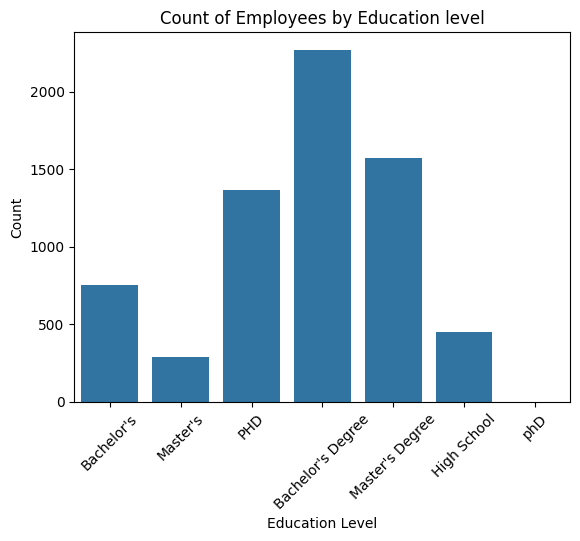

In [34]:
# Count Plot on education level chart 
sns.countplot(data=salary_df,x="Education Level")

#labels 
plt.title("Count of Employees by Education level")
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

(np.float64(-1.099999779369027),
 np.float64(1.0999957080476435),
 np.float64(-1.0999828077706397),
 np.float64(1.0999991813224115))

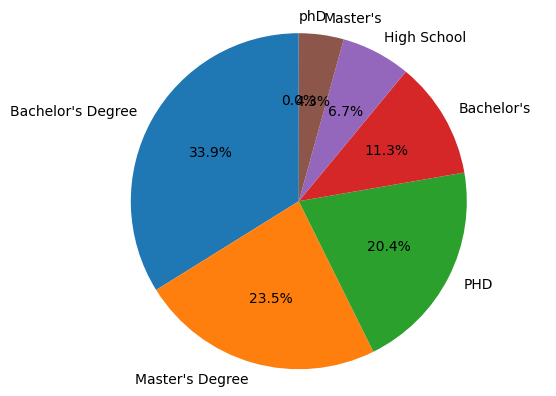

In [35]:
#pie chart 
labels=salary_df["Education Level"].value_counts().index
sizes=salary_df["Education Level"].value_counts().values

fig1,ax1=plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
ax1.axis('equal') # Equal aspect ration ensures thatpie is drawnas circle

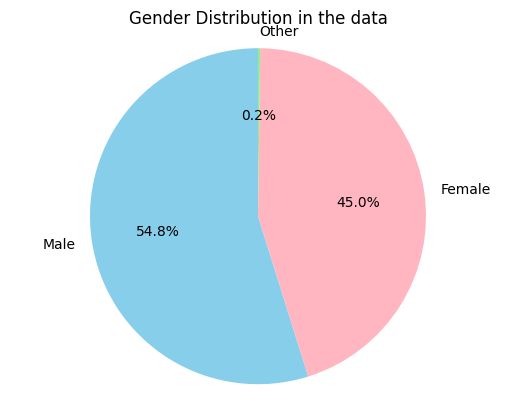

In [36]:
#Pie chart in the gender for male female and others
# Count gender occurrences from the dataframe
gender_counts = salary_df['Gender'].value_counts()

# Plot pie chart
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightpink', 'lightgreen']
)

plt.axis('equal')  # Makes the pie chart a circle
plt.title("Gender Distribution in the data")
plt.show()

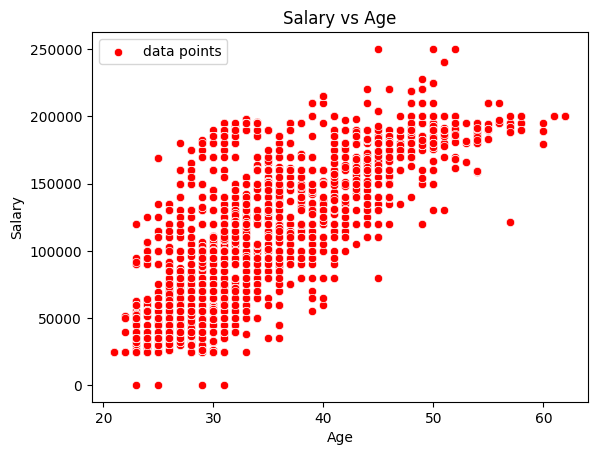

In [37]:
# Scatter Plot 
sns.scatterplot(data=salary_df,x="Age",y="Salary",color="red",label="data points")

#labels
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


# Scatterplot baata k herna sakinchha vane age sang sangai salary pani badhdai gaako chha
# Scatterplot le duiwota column bich ko relationship laai dekhaaucha 

### Part 20

In [38]:
# Pie chart based on gender 
gender_counts=salary_df["Gender"].value_counts()
gender_counts

Gender
Male      3676
Female    3014
Other       14
Name: count, dtype: int64

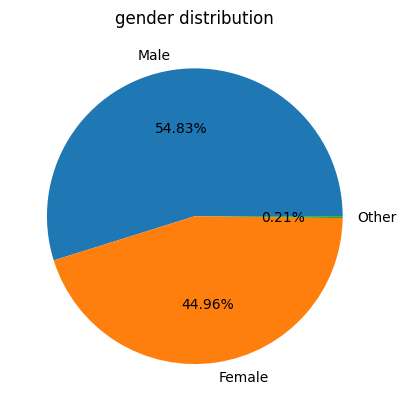

In [39]:
# Pie chart based on gender distribution 
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.2f%%')
plt.title("gender distribution")
plt.show()

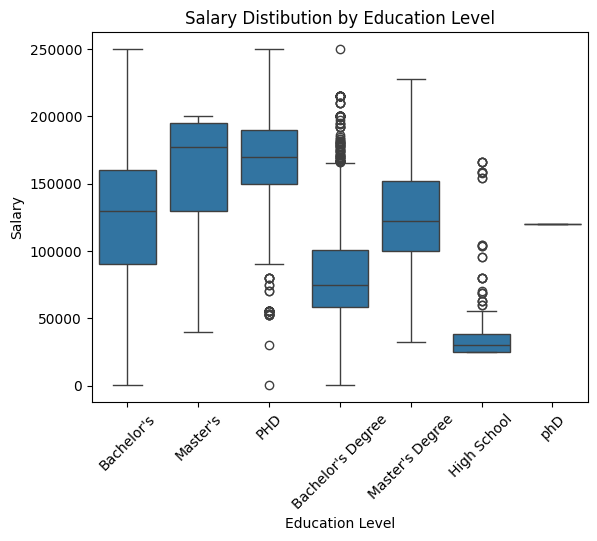

In [40]:
# boxplot 
sns.boxplot(data=salary_df,x="Education Level",y="Salary")
#labels
plt.title('Salary Distibution by Education Level')
plt.xticks(rotation=45)
plt.ylabel('Salary')
plt.show()

    -Line inside box-> Median(Q2)
    -Box edge->25th percentile (Q1) and 7th percentile (Q3)
    -Whiskers -> Min and Max values (excluding outliers)
    - Dots outside whiskers -> Outliers

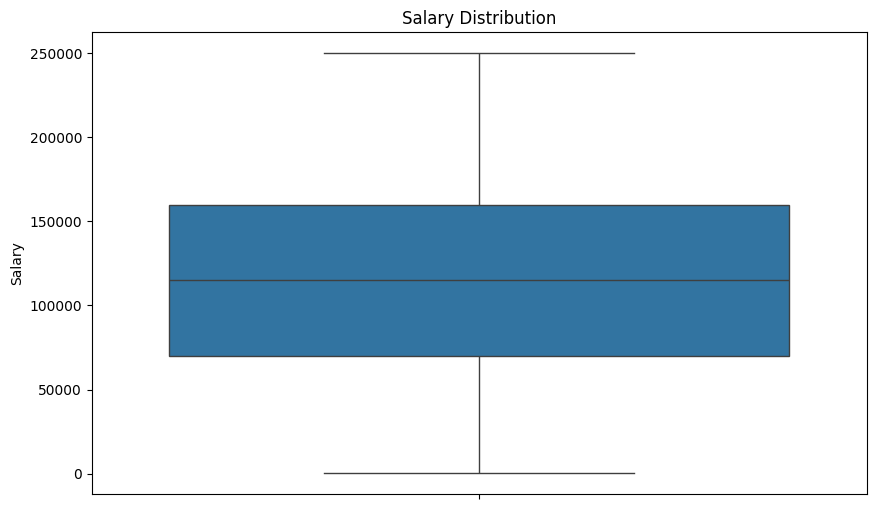

In [41]:
# Checking the boxplots of salary only
plt.figure(figsize=(10,6))                #Yocode e figure ko size laai maitan garna sakinchha
sns.boxplot(y=salary_df["Salary"])

#labels
plt.title('Salary Distribution')
plt.ylabel('Salary')
plt.show()


In [42]:
# Return Top ten salary based on education level
top_ten_salary=df_no_duplicates.sort_values("Salary",ascending=False).head(10)
top_ten_salary


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
83,52.0,Male,PHD,Chief Technology Officer,24.0,250000.0
5001,45.0,Male,Bachelor's Degree,Financial Manager,21.0,250000.0
4276,51.0,Male,PHD,Data Scientist,24.0,240000.0
4397,49.0,Male,Master's Degree,Marketing Manager,23.0,228000.0
4152,50.0,Male,PHD,Data Scientist,23.0,225000.0
4027,49.0,Male,PHD,Data Scientist,22.0,220000.0
2664,46.0,Male,PHD,Director of Data Science,20.0,220000.0
105,44.0,Male,PHD,Chief Data Officer,16.0,220000.0
2260,46.0,Female,PHD,Director of Data Science,20.0,220000.0


C:\Users\Bina computer jnk\AppData\Local\Temp\ipykernel_11656\1495140008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ten_salary,x='Job Title',y='Salary',palette="coolwarm")


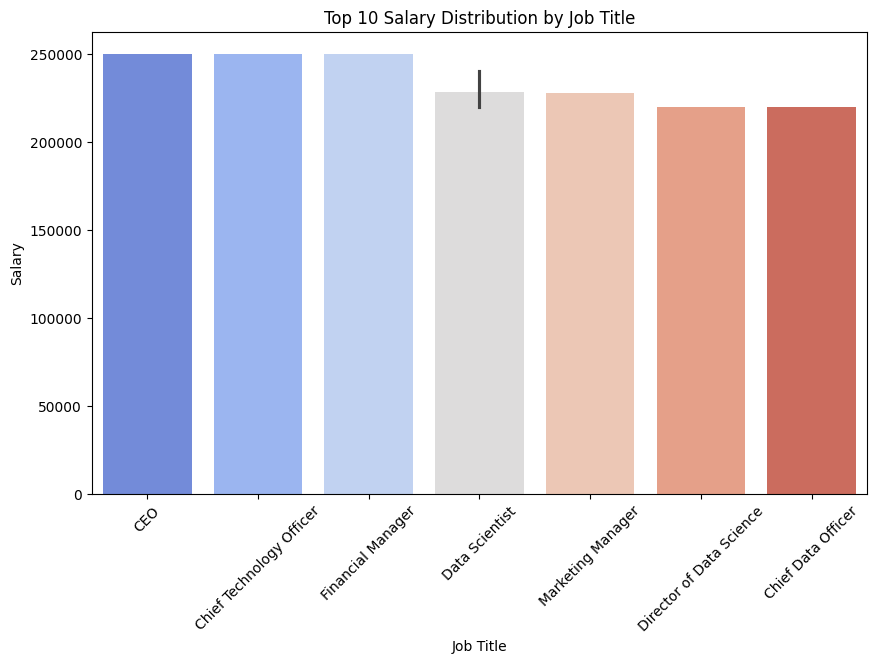

In [43]:
#barplot
plt.figure(figsize=(10,6))
sns.barplot(data=top_ten_salary,x='Job Title',y='Salary',palette="coolwarm")

#labels
plt.title('Top 10 Salary Distribution by Job Title')
plt.xticks(rotation=45)
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()
  